#### Load Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Data

In [14]:
# File paths
class_file = 'CLASS.xlsx'
data_file = 'death_population_final_combined.xlsx'

# Read the files
class_df = pd.read_excel(class_file)
data_df = pd.read_excel(data_file)

# Displaying the first few rows of each dataframe to understand the structure
class_df.head(50)


,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN
5,United Arab Emirates,ARE,Middle East & North Africa,High income,NaN
6,Argentina,ARG,Latin America & Caribbean,Upper middle income,IBRD
7,Armenia,ARM,Europe & Central Asia,Upper middle income,IBRD
8,American Samoa,ASM,East Asia & Pacific,High income,NaN
9,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD


In [3]:
data_df.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [13]:
# Merging the data on the country code to combine regional information with the yearly data
merged_df = pd.merge(data_df, class_df[['Code', 'Region']], left_on='country_code', right_on='Code', how='left')

# Calculating the mortality rate per 100,000 people for each year and country
merged_df['mortality_rate'] = (merged_df['total_deaths'] / merged_df['population']) * 1000000

# Grouping the data by region and year to create a region-wise dataset
region_yearly_df = merged_df.groupby(['Region', 'year']).agg(
    total_deaths=pd.NamedAgg(column='total_deaths', aggfunc='sum'),
    total_population=pd.NamedAgg(column='population', aggfunc='sum'),
).reset_index()

# Calculating the mortality rate per 100,000 people for each region and year
region_yearly_df['mortality_rate'] = (region_yearly_df['total_deaths'] / region_yearly_df['total_population']) * 100000

# Checking the final grouped dataset
region_yearly_df.head(50)

<bound method DataFrame.nunique of                   Region  year  total_deaths  total_population  mortality_rate
0    East Asia & Pacific  2001        3094.0      2.043839e+09        0.151382
1    East Asia & Pacific  2002        3277.0      2.061155e+09        0.158989
2    East Asia & Pacific  2003        2730.0      2.077692e+09        0.131396
3    East Asia & Pacific  2004      178682.0      2.093640e+09        8.534512
4    East Asia & Pacific  2005        3198.0      2.109418e+09        0.151606
..                   ...   ...           ...               ...             ...
156   Sub-Saharan Africa  2019       10965.0      1.121549e+09        0.977666
157   Sub-Saharan Africa  2020        1503.0      1.151302e+09        0.130548
158   Sub-Saharan Africa  2021        4469.0      1.181163e+09        0.378356
159   Sub-Saharan Africa  2022        8446.0      1.211170e+09        0.697342
160   Sub-Saharan Africa  2023        4524.0      1.241882e+09        0.364286

[161 rows x 5 co

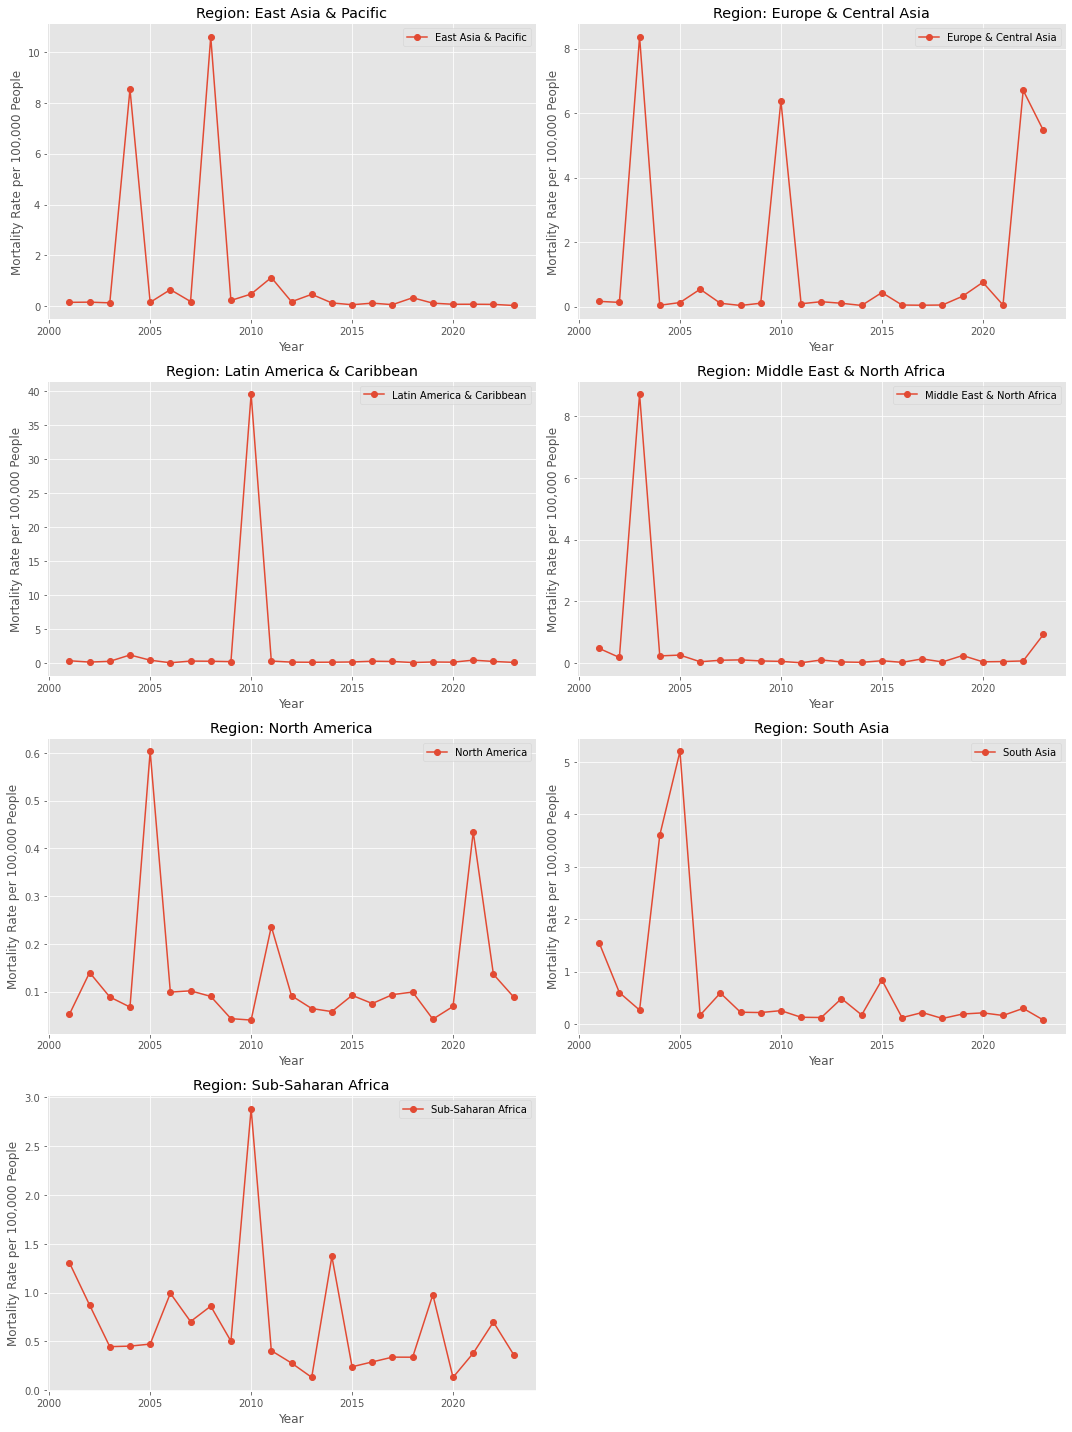

In [5]:
# Getting the unique regions
regions = region_yearly_df['Region'].unique()
# Adjusting the figure setup for 7 subplots with auto y-limits for each
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Flattening the array of axes for easy iteration
axs = axs.flatten()

# Plotting the mortality rate for each region in a separate subplot with auto y-limits
for i, region in enumerate(regions):
    # Filter the data for the region
    temp_df = region_yearly_df[region_yearly_df['Region'] == region]
    # Plot on the ith subplot
    axs[i].plot(temp_df['year'], temp_df['mortality_rate'], label=region, marker='o')
    axs[i].set_title(f'Region: {region}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Mortality Rate per 100,000 People')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].autoscale(axis='y', tight=False)  # Enable auto-scaling for the y-axis

# Removing the last empty subplot (as there are 7 regions but 8 subplots)
fig.delaxes(axs[-1])

# Adjusting layout for a cleaner look
plt.tight_layout()
plt.show()



In [6]:
# Merging the data on the country code to combine income group information with the yearly data
income_merged_df = pd.merge(data_df, class_df[['Code', 'Income group']], left_on='country_code', right_on='Code', how='left')

# Calculating the mortality rate per 100,000 people for each year and country
income_merged_df['mortality_rate'] = (income_merged_df['total_deaths'] / income_merged_df['population']) * 1000000

# Grouping the data by income group and year to create an income-wise dataset
income_yearly_df = income_merged_df.groupby(['Income group', 'year']).agg(
    total_deaths=pd.NamedAgg(column='total_deaths', aggfunc='sum'),
    total_population=pd.NamedAgg(column='population', aggfunc='sum'),
).reset_index()

# Calculating the mortality rate per 100,000 people for each income group and year
income_yearly_df['mortality_rate'] = (income_yearly_df['total_deaths'] / income_yearly_df['total_population']) * 1000000

income_yearly_df.head()

,Income group,year,total_deaths,total_population,mortality_rate
0,High income,2001,822.0,1.084684e+09,0.757825
1,High income,2002,1132.0,1.091345e+09,1.037252
2,High income,2003,73153.0,1.098036e+09,66.621707
3,High income,2004,675.0,1.104935e+09,0.610895
4,High income,2005,3248.0,1.112178e+09,2.920396


In [7]:
income_yearly_df.isna().sum()

Income group        0
year                0
total_deaths        0
total_population    0
mortality_rate      0
dtype: int64

In [8]:
# Getting the unique income groups
income_groups = income_yearly_df['Income group'].dropna().unique()

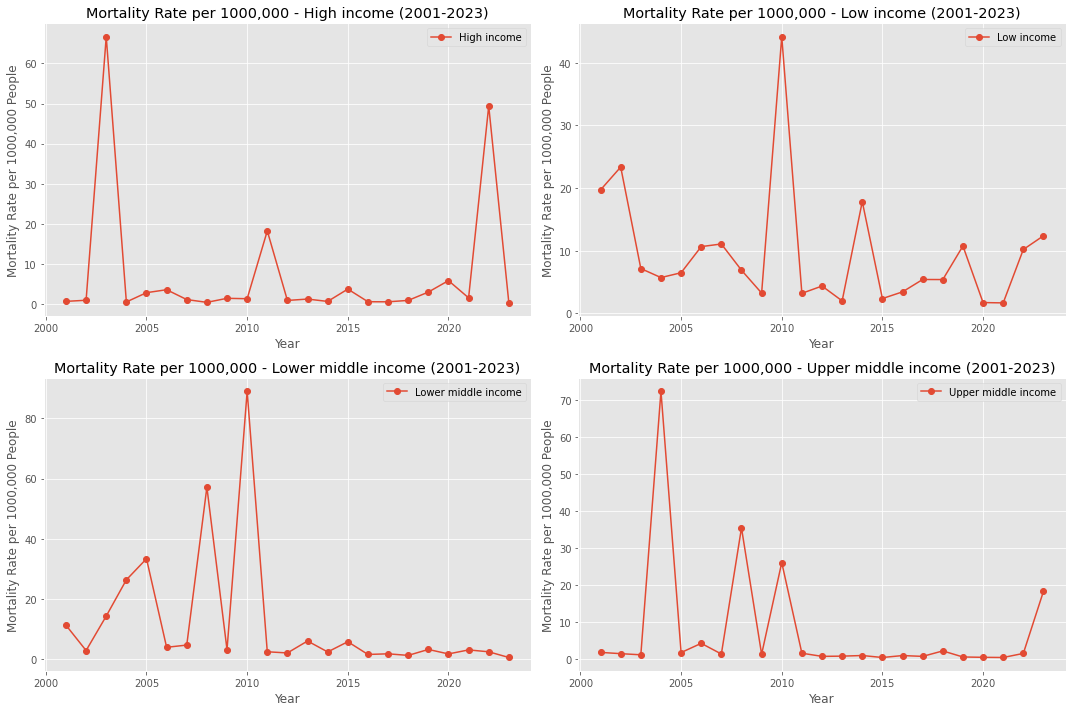

In [9]:
# Adjusting the figure setup for 4 subplots to accommodate all income groups
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flattening the array of axes for easy iteration
axs = axs.flatten()

# Plotting the mortality rate for each income group in a separate subplot with auto y-limits
for i, income_group in enumerate(income_groups):
    # Filter the data for the income group
    temp_df = income_yearly_df[income_yearly_df['Income group'] == income_group]
    # Plot on the ith subplot
    axs[i].plot(temp_df['year'], temp_df['mortality_rate'], label=income_group, marker='o')
    axs[i].set_title(f'Mortality Rate per 1000,000 - {income_group} (2001-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Mortality Rate per 1000,000 People')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].autoscale(axis='y', tight=False)  # Enable auto-scaling for the y-axis

# Adjusting layout for a cleaner look
plt.tight_layout()
plt.show()


In [10]:
# Filter the data for Afghanistan
selected_country = 'Afghanistan'
country = data[data['country'] == selected_country]

# Calculate the mortality rate
country['mortality_rate'] = (country['total_deaths'] / country['population']) * 1e6
country.tail()

NameError: name 'data' is not defined

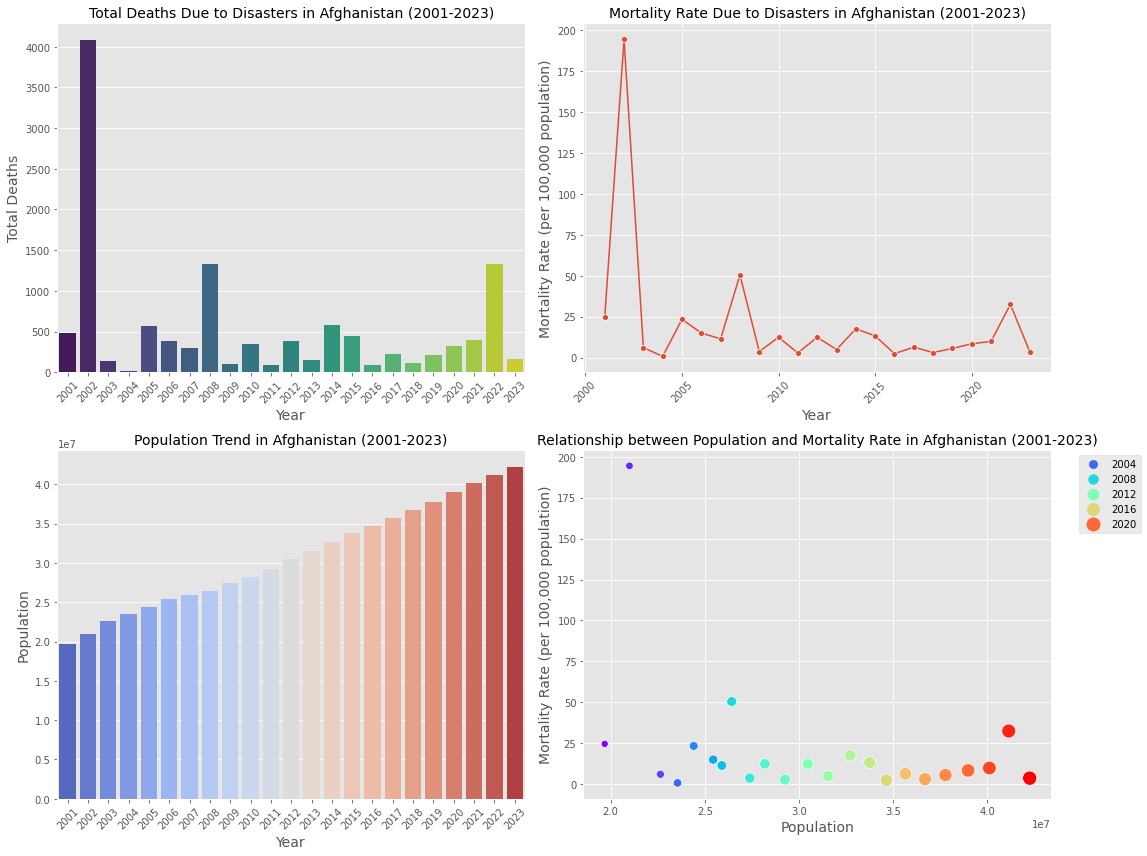

In [ ]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=country, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=country, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=country, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=country, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = country[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

In [ ]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2002-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='additive',
    #changepoint_prior_scale=0.1,
    #seasonality_prior_scale=15,
    #holidays_prior_scale=15,
    mcmc_samples=0
)

# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=20)
# Now, you can fit your model on the training dataset
model.fit(train_df)

# And use the model to make predictions, then compare with the test dataset
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future_dates)

12:17:00 - cmdstanpy - INFO - Chain [1] start processing
12:17:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
# rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
# print(f"The RMSE of the forecast is: {rmse}")

# # Calculate MAPE
# mape = mean_absolute_percentage_error(actual_values, forecasted_values)
# print(f"The MAPE of the forecast is: {mape}")


The MAE of the forecast is: 8.561493878704061


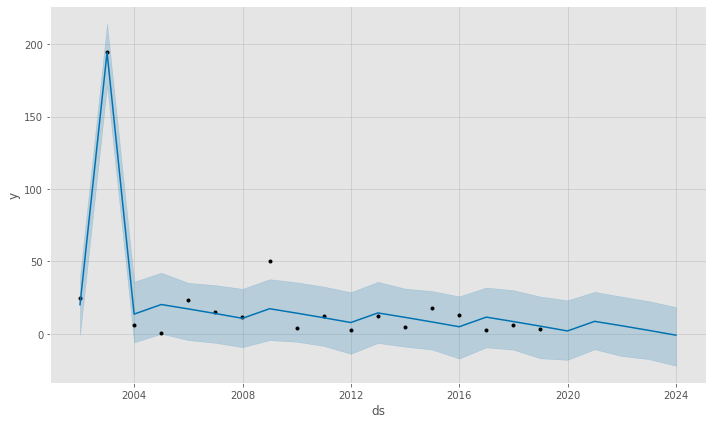

In [ ]:
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)


#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

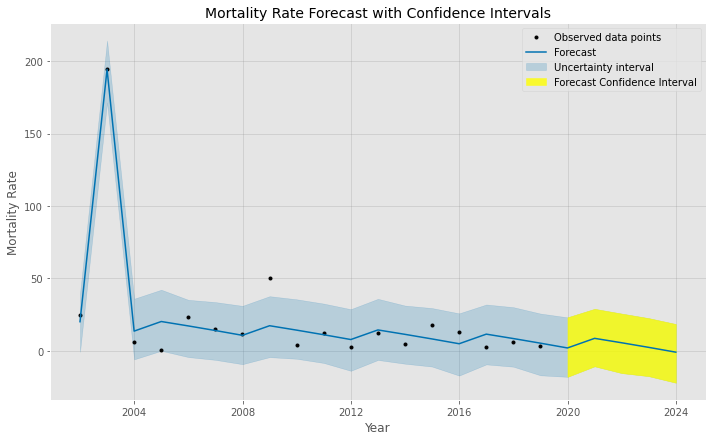

In [ ]:
# Plot the forecast
fig = model.plot(forecast, uncertainty=True)

# Highlight the prediction (2023-2025) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] > forecast['ds'].iloc[-6]), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.set_xlabel('Year', fontsize=12)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=12)  # Set the Y-axis label
ax.set_title('Mortality Rate Forecast with Confidence Intervals', fontsize=14)  # Set the title

# Add changepoints to plot (optional, uncomment if needed)
# add_changepoints_to_plot(fig.gca(), model, forecast)

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)  # Set the linewidth of the legend lines

plt.show()


In [ ]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds      yhat  yhat_lower  yhat_upper
17 2018-12-31  5.292902  -16.908602   25.733453
18 2019-12-31  1.981517  -17.966095   23.130388
19 2020-12-31  8.615522  -10.676896   28.980481
20 2021-12-31  5.566389  -15.363977   25.706286
21 2022-12-31  2.384735  -17.480115   22.555075
22 2023-12-31 -0.926650  -22.014796   18.501822


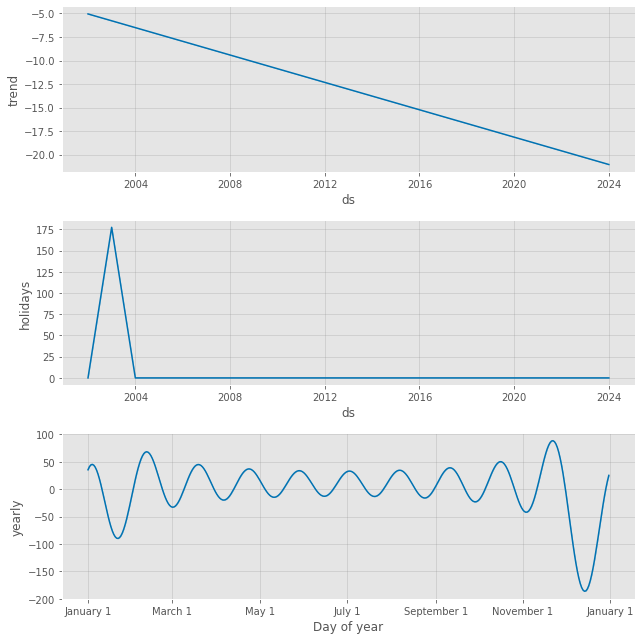

In [ ]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast)

In [ ]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define the carrying capacity. This is just an example value.
# You need to set this to a reasonable value based on your knowledge of the domain.
train_df['cap'] = 200
test_df['cap'] = 200

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2002-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with logistic growth
model = Prophet(
    interval_width=0.95,
    growth='logistic',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='additive',
    changepoint_prior_scale=1,
    #seasonality_prior_scale=15,
    #holidays_prior_scale=15,
    mcmc_samples=0
)
# Fit your model on the training dataset
model.fit(train_df)

# Use the model to make predictions on the future dataframe
# Make sure to include the carrying capacity in the future dataframe
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
future_dates['cap'] = 200  # This should be the same value as in the training data
forecast = model.predict(future_dates)


12:17:01 - cmdstanpy - INFO - Chain [1] start processing
12:17:01 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
print(f"The RMSE of the forecast is: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_values, forecasted_values)
print(f"The MAPE of the forecast is: {mape}")

The MAE of the forecast is: 7.846628102230935
The RMSE of the forecast is: 13.134993417905434
The MAPE of the forecast is: 0.5421438003313603


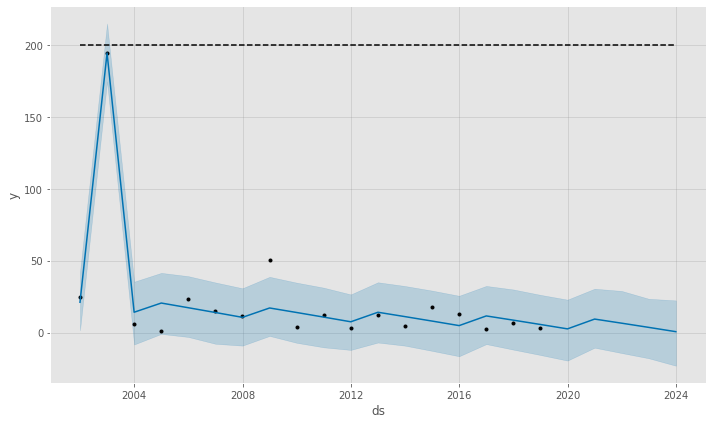

In [ ]:
# Plot the forecast
fig = model.plot(forecast)


#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

In [ ]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

           ds      yhat  yhat_lower  yhat_upper
18 2019-12-31  2.574651  -19.490353   22.891828
19 2020-12-31  9.387043  -10.516959   30.498652
20 2021-12-31  6.532561  -14.236057   28.944626
21 2022-12-31  3.613291  -17.862671   23.504871
22 2023-12-31  0.631337  -23.031600   22.362973
